In [2]:
import tensorflow as tf

In [3]:
# load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [6]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
# compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
# train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2924 - accuracy: 0.9154 - val_loss: 0.1408 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1447 - accuracy: 0.9575 - val_loss: 0.1035 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1071 - accuracy: 0.9675 - val_loss: 0.0933 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.0799 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0763 - accuracy: 0.9753 - val_loss: 0.0754 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0688 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0591 - accuracy: 0.9809 - val_loss: 0.0689 - val_accur

<function matplotlib.pyplot.legend(*args, **kwargs)>

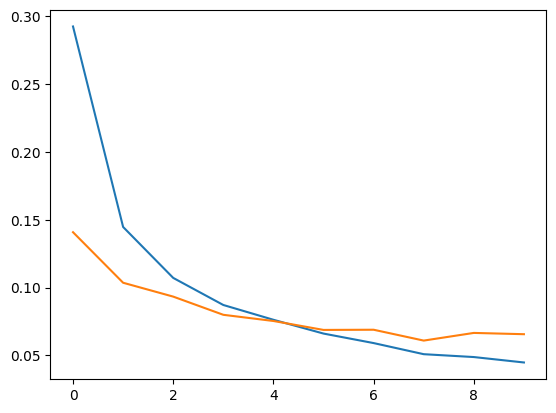

In [9]:
# plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

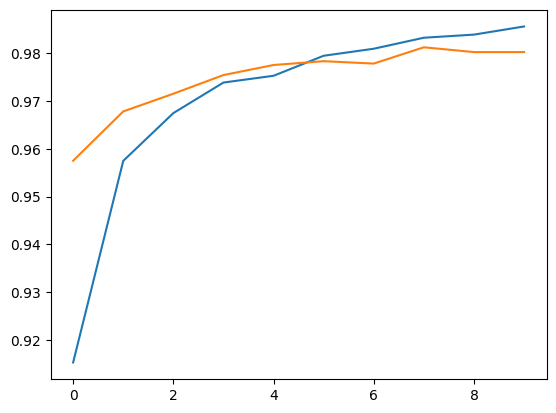

In [10]:
# plot accuracy per iteration
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend

In [11]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9802
[0.06562244147062302, 0.9801999926567078]


In [ ]:
# plot some missclassified examples
import numpy as np
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choce(missclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))